# Experiments

In [ ]:
print("""Structural descriptors of complex networks""")
print("""Autors: Edison Bejarano - Eric Walzthöny""")

### Issues 1: Average Degree

In [ ]:
"""
Checking el average degree 
tu formula de:

    average_degree = "{:.4f}".format(
                                    float(edges / nodes)
                                    )  # Total Edges/Total Nodes=Average Degree

Esta mal, porque solo toma en cuenta el numero total de nodos
(asume que cada nodo tiene una sola conexion), y no las conexiones de cada nodo. 

Por ejemplo, el nodo, O2, abajo:     
    O1-O2-O3
       |
       O4
Hay 4 nodos, pero no todos tienen el degree igual
Nodo 01, 03, 04 - Degree: 1 (una conexion)
Nodo 02 - Degree: 3 (tres conexiones)

Fijate en la implementacion de abajo de "average_degree_graph", que se copio del libro.


"""

import numpy as np
import igraph
from igraph import mean


## loading a sample network
g = net_files['toy']['rb25.net'][0]

## Edges & Vertices (Nodes)
edges = g.ecount()
vertex = g.vcount()

## Checking Degrees of the network
## Tu implementacion 
edison_average_degree = edges / vertex  # Total Edges / Total Nodes =Average Degree
# Manual Method 1
avg_degree_calculated = sum(g.degree()) / vertex
## Manual Method 2
igraph_avg_degree_calculated = round(mean(g.degree()), 3)
## Manual Method 3
def average_degree_graph(graph:igraph.Graph) -> float:
    """
    manually calculates the degree of each vertex
    
    from the textbook (CN, page 127):
    
    Average Degree = 1/n * sum(degree of vertex in g)
    
    """
    ## Degree (Connections) for each node in the graph 
    list_of_degrees = [x.degree() for x in graph.vs()]
    ## Sum of all the degrees (Connections)
    degree_sum = sum(list_of_degrees)
    ## Sum_Degrees / (total number of nodes)
    average_degree = degree_sum / graph.vcount()
    return average_degree

## Comparing the results 
print(edges, vertex)
print(edison_average_degree, avg_degree_calculated, igraph_avg_degree_calculated, average_degree_graph(g))

### Issues 2: Transitivity / Average Clustering coefficient

In [ ]:
## Chapter 7 complex networks !!!!!!!!!!!!!!!!!!

## The professor asks for this: 
## Average clustering coefficient (average of the clustering coefficient of each node)
## This means:
## For each node / vertex: calculate the transitivity 
## average the transitivty 

# transitivity for each node in the graph  
trans_per_vertex = [round(g.transitivity_local_undirected(vertices=v['id']),4) for v in g.vs()]

# average of all transitivities 
average_transitivty = round(np.mean(trans_per_vertex), 4)

## check if they are the same 
assert average_transitivty == (round(sum(trans_per_vertex) / g.vcount(),4))
## these two are equal 
print(round(sum(trans_per_vertex) / g.vcount(),4))
print(average_transitivty)

## These two are the same as above
## this is the average transitivity of each node!
print(round(g.transitivity_avglocal_undirected(), 4))
## this as well 
print(round(np.mean(g.transitivity_local_undirected()),4))

# only off one 
## this is the global transitivity for all the network
## this will only take the global connectiveness of nodes
## wvu - uvw, but not the individual nodes connections
print("This is the weird one")
print(round(g.transitivity_undirected(),4))


### Issues 3: Average Path Length

In [ ]:
## Proff wants this:
## Average path length (average distance between all pairs of nodes)
## to do this: 
## length of paths for each node 
## average it out for all nodes 
avg_path_len = g.average_path_length()

print(avg_path_len)

# shortest paths 
## from the documentation:
## Calculates shortest path lengths for given vertices in a graph.
## this will return ONLY THE SHORTEST path for each node 
## if node A has 3 paths: 1.3, 4.5, 0.9, it will return 0.9 
## and not the average(1.3, 4.5, 0.9) ~~ correct average length for each node 
sh_path = g.shortest_paths()

## get all the paths 
print(np.mean(sh_path))

### Testing

In [ ]:
df = pd.read_csv("./results/NEW_Airport_Descriptor.csv")
df = df.drop("Unnamed: 0", axis=1)
df2 = pd.read_csv("./results/Airport_Report_Data_15.csv")
df.head()

In [ ]:
cols = [x for x in df.columns if x not in ["Airport","Degree","Strength","Max Length"]]
df[cols].round(8)

In [1]:
# imports 
from utils.utils import extract_zip, read_net_files
from utils.utils import extract_data_and_save

In [2]:
## Global Variables
ZIP_PATH = './A1-networks.zip'
OUTPUT = './A1-networks/'

In [24]:
##### Part A: Numerical Descriptors of Networks ######
# Extract the zipfile
extract_zip(ZIP_PATH, OUTPUT)
# reading the file
net_files = read_net_files(OUTPUT, verbosity=True)
# return data 
df = extract_data_and_save(net_files, "new_Descriptors", save_csv=True)
#df = df.round(8)
#df.to_csv("./results/New_Descriptors.csv")

Folder already exists
There are 3 datasets in the directory: ./A1-networks/
-->TOY<-- Dataset contains 8 files / graphs
-->REAL<-- Dataset contains 4 files / graphs
-->MODEL<-- Dataset contains 14 files / graphs


In [4]:
# Airport real networks

# define the airport graph, its already in net_files 
airports = net_files['real']['airports_UW.net'][0]
## these need to be shown in a table 
airport_to_calculate = [
                        "PAR",
                        "LON",
                        "FRA",
                        "AMS",
                        "MOW",
                        "NYC",
                        "ATL",
                        "BCN",
                        "WAW",
                        "CHC",
                        "DJE",
                        "ADA",
                        "AGU",
                        "TBO",
                        "ZVA",
                        ]

In [6]:
from utils.airport_descriptors import AirportDescriptor
import gc 
gc.collect()

42

In [7]:
port = AirportDescriptor(airports)

In [ ]:
def extract_airport_descriptors(graph:igraph.Graph, file_name:str, rounding_value:int=8,  ) -> None:
    """Extracts the Descriptors for the specified graph -> Airport in this case"""
    ## pass it through our AirportDescriptor class 
    air_port = AirportDescriptor(graph)
    ## Rounding datframe to 8 decimals 
    df = pd.DataFrame(air_port._summary())
    df = df.round(8)
    df.to_csv("./results/NEW_Airport_Descriptor.csv")
    df.to_csv(f"./results/{file_name}.csv")

In [17]:


import pandas as pd


## selecting only the columns for the report 
df_report = df.loc[df['Airport'].isin(airport_to_calculate)]
df_report = df_report.round(8)
df_report.to_csv("./results/Airport_Report_Data_15.csv")

In [19]:
"""
Maybe increase efficiency with multithreading ?

Yes multithreading pool can work !!

"""
import igraph 
import numpy as np
def get_average_max_len(graph:igraph.Graph, node:int) -> float:
    """ gets all the paths and gets averag and max"""
    ## all the path lengths
    path_len = [len(p) for p in graph.get_all_shortest_paths(v=node)]
    ## average path 
    avg_path = round(np.mean(path_len), 8)
    ## max 
    max_path = round(np.max(path_len), 8)
    
    return avg_path, max_path 


from collections import defaultdict
import gc 
from tqdm import tqdm

def extract_avg_max_len(graph: igraph.Graph) -> dict:
    """Function which iterates over the graph and extracts the avg and max length for each node."""
    d = dict()
    for _, node in enumerate(tqdm(graph.vs())):
        ## id of the node 
        node_id,node_name = node['id'], node['name']
        #print(node_name)
        ## get the distance 
        avg_len, max_len = get_average_max_len(graph, node=node_id)
        d[node_name] = {
                        "avg_len": avg_len,
                        "max_len": max_len
                        }
        gc.collect()
    return d

In [54]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [127]:
def make_histograms_pdf(networks_to_graph:list, bins:int, figsize:tuple):
    """Plots and saves the histograms (PDF) of the given networks to plot"""

    
    ## reading the graphs 
    loaded_graphs = [igraph.read(x) for x in networks_to_graph]

    ## degrees for each 
    degrees_per_graph = [x.degree_distribution()._bins for x in loaded_graphs]
    ## names
    names = [x.split("/")[-1].replace(".","_") for x in networks_to_graph]
    # making a dictionary
    d = dict(zip(names, degrees_per_graph))
    
    # plotting
    for k, v in d.items():
        plot_linear_log_histogram(graph_bins=v,
                                    number_bins=bins,
                                    graph_name=k,
                                    figure_size=figsize)

In [147]:
## getting the degrees for the following networks 
networks_to_graph = [
                    "./A1-networks/model/ER5000k8.net",
                    "./A1-networks/model/SF_1000_g2.7.net",
                    "./A1-networks/model/ws1000.net",
                    "./A1-networks/real/airports_UW.net",
                    "./A1-networks/real/PGP.net"
                    ]

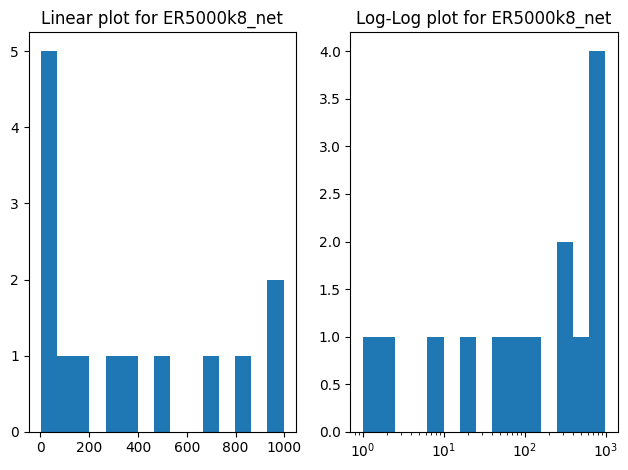

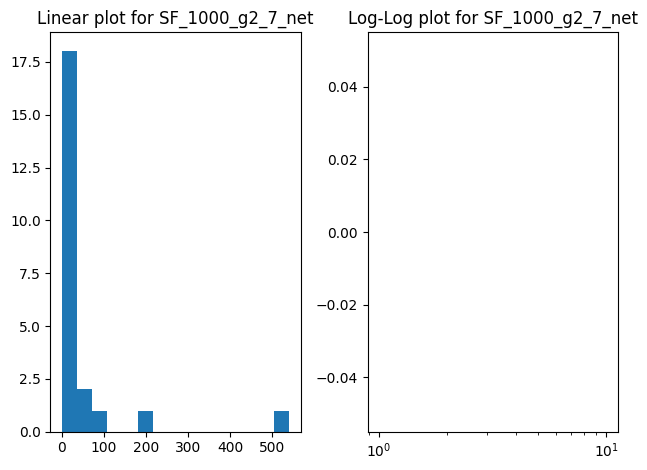

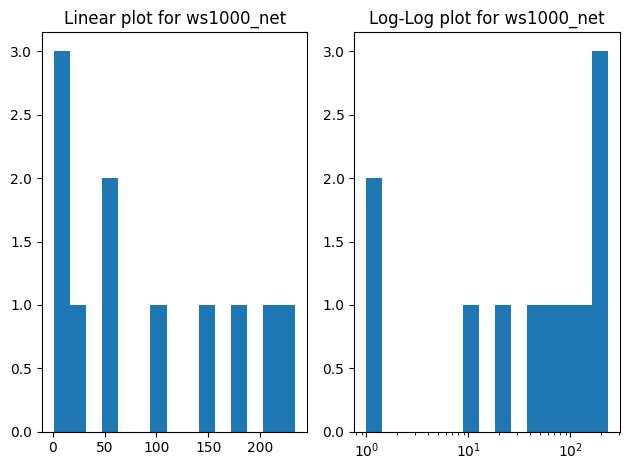

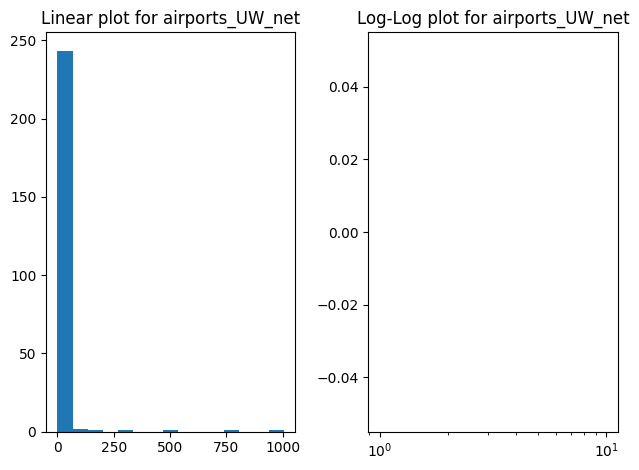

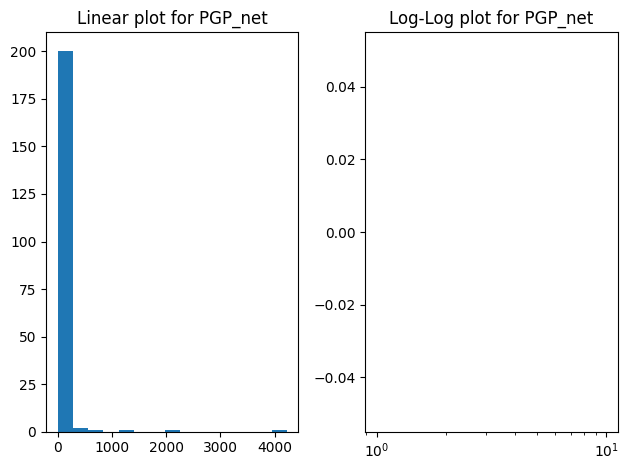

In [149]:
make_histograms_pdf(networks_to_graph, bins=15, figsize=(12,8))

In [146]:
## graphing
import seaborn as sns 
import matplotlib.pyplot as plt 
def plot_linear_log_histogram(graph_bins:list, number_bins:int, graph_name:str,figure_size:tuple) -> None:
    """Plots the Linear and the Log Histogram"""
    # histogram on linear scale
    plt.subplot(121)
    #fig, axs = plt.subplots(1,2,figsize=figure_size)
    hist, bins, _ = plt.hist(graph_bins, bins=number_bins)
    #axs[0].hist(graph_bins, bins=number_bins)
    plt.title(f"Linear plot for {graph_name}")

    # histogram on log scale. 
    # Use non-equal bin sizes, such that they look equal on log scale.
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.subplot(122)
    plt.hist(graph_bins, bins=logbins)
    plt.xscale('log')
    plt.title(f"Log-Log plot for {graph_name}")
    # save the figure 
    plt.savefig(f'./images/FIGURE_{graph_name}')
    plt.tight_layout()
    plt.show()

In [ ]:
plt.hist()

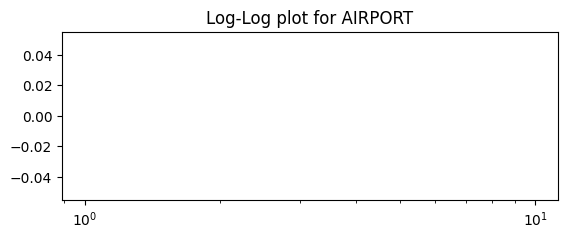

In [79]:
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(degrees, bins=logbins)
plt.xscale('log')
plt.title(f"Log-Log plot for AIRPORT")
plt.show()